/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

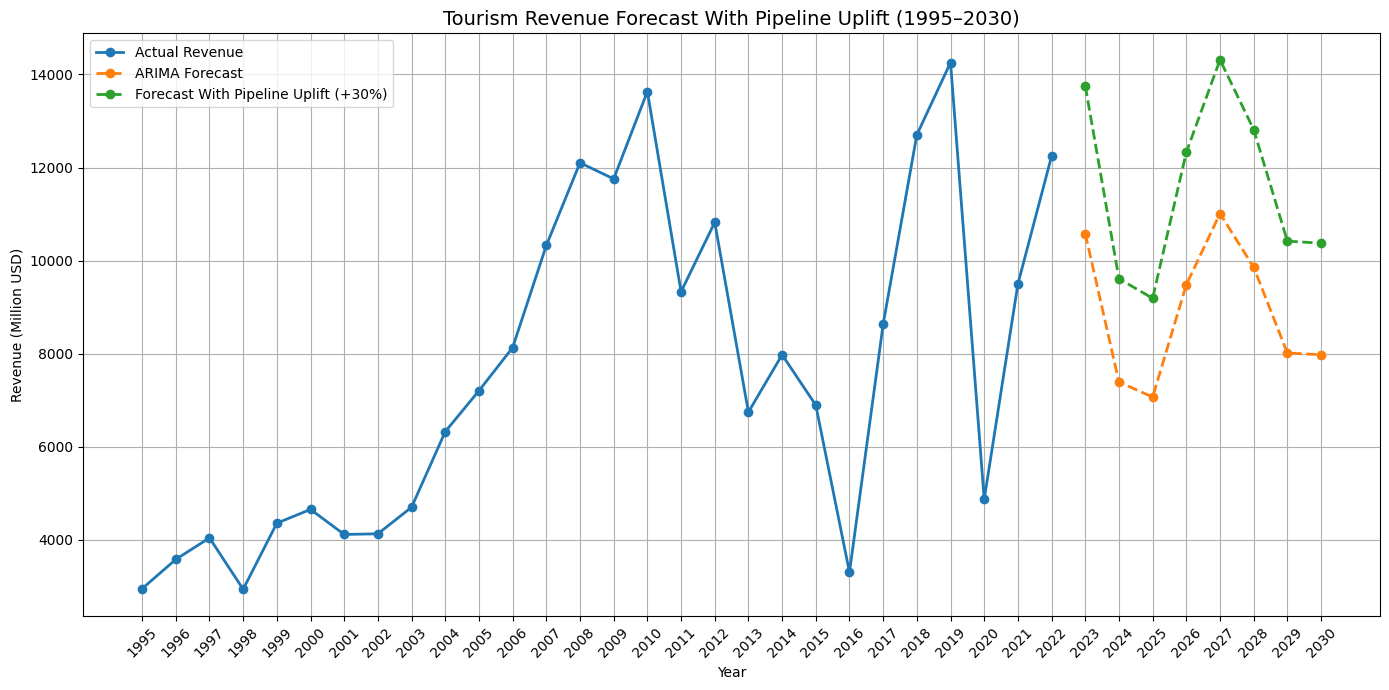

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------------------
# 1. Load Your Data
# ---------------------------------------

data = {
    "Year": [2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995],
    "Receipts": [12245,9499,4874,14256,12704,8636,3306,6897,7979,6747,10823,9333,13633,11757,12104,10327,8133,7206,6328,4704,4133,4119,4657,4361,2942,4046,3583,2954]
}

df = pd.DataFrame(data)
df = df.sort_values("Year")
df.set_index("Year", inplace=True)

# ---------------------------------------
# 2. Fit ARIMA Model
# ---------------------------------------

model = ARIMA(df["Receipts"], order=(2,1,2))
model_fit = model.fit()

# ---------------------------------------
# 3. Forecast Until 2030
# ---------------------------------------

forecast_years = list(range(df.index[-1] + 1, 2031))  # 2023 to 2030
forecast = model_fit.forecast(steps=len(forecast_years))
forecast.index = forecast_years

# ---------------------------------------
# 4. Apply Pipeline Uplift (10–18%)
# ---------------------------------------

# You can pick a specific uplift — here we use 15% (middle value)
uplift_percentage = 0.3
uplift_forecast = forecast * (1 + uplift_percentage)

# ---------------------------------------
# 5. Combine Actual + Forecast
# ---------------------------------------

combined = pd.concat([
    df["Receipts"],
    forecast.rename("ARIMA Forecast"),
    uplift_forecast.rename("Pipeline Uplift Forecast")
])

# ---------------------------------------
# 6. Plot Comparison Graph
# ---------------------------------------

plt.figure(figsize=(14,7))

# Actuals
plt.plot(df.index, df["Receipts"], label="Actual Revenue", linewidth=2, marker="o")

# ARIMA Forecast
plt.plot(forecast.index, forecast, label="ARIMA Forecast", linestyle="--", linewidth=2, marker="o")

# Pipeline uplift forecast
plt.plot(uplift_forecast.index, uplift_forecast,
         label="Forecast With Pipeline Uplift (+30%)", linestyle="--", linewidth=2, marker="o")

plt.xticks(np.arange(1995, 2031, 1), rotation=45)
plt.title("Tourism Revenue Forecast With Pipeline Uplift (1995–2030)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Revenue (Million USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
